## Model simulation: Biochemical reactor with Monod kinetics

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

In [1]:
# Importing python libraries
import sys
import os
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Layout

%load_ext autoreload
%autoreload 1

# We import all of our functions prepared in advanced
sys.path.append("../functions")
%aimport general_functions
%aimport monod
function_derivatives = monod.model_derivatives

#Check Python version
print(sys.version)

3.9.15 (main, Nov 24 2022, 14:39:17) [MSC v.1916 64 bit (AMD64)]


## Model simulation

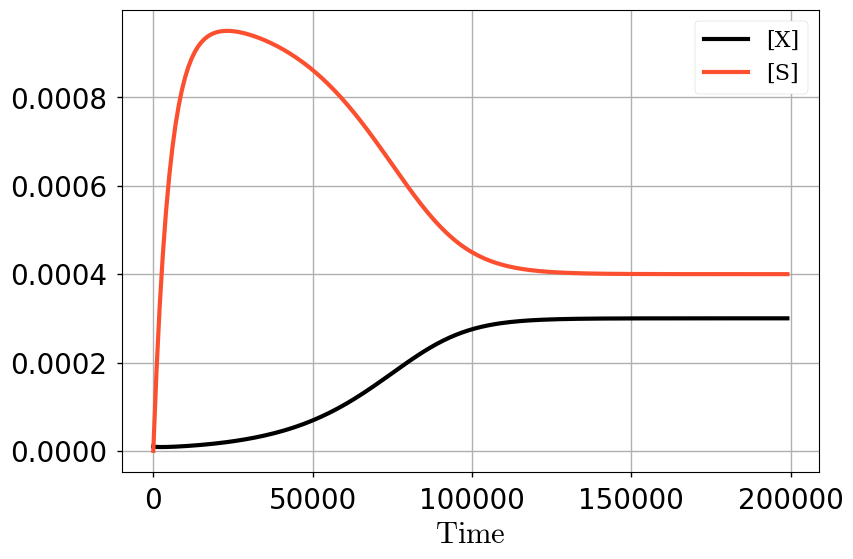

In [3]:
# Initial conditions
X_init = 1e-5
S_init = 0

df = general_functions.model(
    np.arange(0, 200000, 1000), # Timesteps
    [X_init, S_init], # Initial conditions
    ['[X]','[S]'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    mu_max=3e-4, Q=1, V=5000, Y=0.5, K_S=2e-4, S_in=0.001)

'''ax = plt.gca()
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=True)
ax.yaxis.set_major_formatter('{x:.0e}')
ax.xaxis.set_major_formatter('{x:1.2g}')'''

plt.show()

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of initial conditions

In [7]:
def interactive_model(logX, logS):
    general_functions.model(
        np.arange(0, 200000, 10), # Timesteps
        [10**logX, 10**logS],     # Initial conditions
        [r'$[X]$',r'$[S]$'],      # Variable names
        function_derivatives,     # Function derivatives
        returnDataFrame=True, plotresults=True,
        # Specify parameter values
        mu_max=3e-4, Q=1, V=5000, Y=0.5, K_S=2e-4, S_in=0.001)

interact(interactive_model,
        logX=IntSlider(value=-5, min=-6, max=0, step=1, description='log([X])', continuous_update=False),
        logS=IntSlider(value=-6, min=-6, max=0, step=1, description='log([S])', continuous_update=False));

interactive(children=(IntSlider(value=-5, continuous_update=False, description='log([X])', max=0, min=-6), Int…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of kinetic parameter values

In [9]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 200000, 10)), # Time steps
         init=fixed([1e-5, 0]),                     # Initial conditions
         varnames=fixed([r'$[X]$',r'$[S]$']),       # Variable names
         f=fixed(function_derivatives),             # Function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # Specify the parameter values
         mu_max=FloatSlider(value=3e-4, min=1e-4, max=1e-3, step=1e-4, description=r'$\mu_max$', continuous_update=False,readout_format='.4f'),
         Q=fixed(1), V=fixed(5000),
         Y=FloatSlider(value=0.5, min=0.1, max=1, step=0.1, description=r'$Y$', continuous_update=False),
         K_S=FloatSlider(value=2e-4, min=1e-4, max=1e-3, step=1e-4, description=r'$K_s$', continuous_update=False,readout_format='.4f'), 
         S_in=fixed(1e-3));

interactive(children=(Checkbox(value=False, description='twinax'), FloatSlider(value=0.0003, continuous_update…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of flow parameters and inlet $S$

In [11]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 200000, 10)), # Time steps
         init=fixed([1e-5, 0]),                     # Initial conditions
         varnames=fixed([r'$[X]$',r'$[S]$']),       # Variable names
         f=fixed(function_derivatives),             # Function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # Specify parameter values
         mu_max=fixed(3e-4),
         Q=FloatSlider(value=1, min=.1, max=5, step=0.1, description='Q', 
         continuous_update=False,readout_format='.1f'),
         V=FloatSlider(value=5000, min=1000, max=10000, step=1000, 
         description='V', continuous_update=False,readout_format='4.0d'),
         Y=fixed(0.5), 
         K_S=fixed(2e-4), 
         S_in=FloatSlider(value=1e-3, min=0, max=0.01, step=1e-3, description='S_in', 
         continuous_update=False,readout_format='.3f'));

interactive(children=(Checkbox(value=False, description='twinax'), FloatSlider(value=1.0, continuous_update=Fa…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Sensitivity analysis of the biochemical reactor with Monod kinetics

In [14]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 200000, 10)), # Time steps
    init=fixed([1e-5, 0]),                     # Initial conditions
    varnames=fixed([r'$[X]$',r'$[S]$']),           # Variable names
    f=fixed(function_derivatives),             # Function derivatives
    parametername=ToggleButtons(options=['mu_max', 'Q', 'V', 'Y', 'K_S', 'S_in']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    mu_max=fixed(3e-4), Q=fixed(1), V=fixed(5000), Y=fixed(0.5),
    K_S=fixed(2e-4), S_in=fixed(1e-3));

interactive(children=(ToggleButtons(description='parametername', options=('mu_max', 'Q', 'V', 'Y', 'K_S', 'S_i…

## Calibration

1. We first generate some noisy data based on our previous model with some model parameters
2. We calibrate the model to find the optimal set of parameters that best fits this new noisy data
3. The minimisation algorithm is run until we obtain calibrated parameters close to the original set of parameters from our model (which satisfies certain solver criteria between minimisation iterations, e.g. solver tolerance)

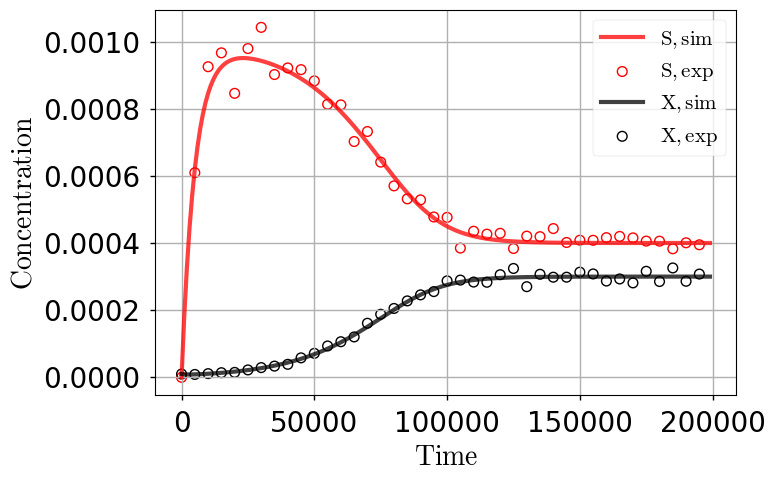

In [20]:
import matplotlib.pyplot as plt
size_data = int(200000/1000)
time=np.arange(0, 200000, 1000)
noise_data_ratio=0.05
# Based on Gaussian noise
# Our current solution
steps = 5
# We only select a certain amount of points
X = df['X'][::steps]
S = df['S'][::steps]
time_new = time[::steps]
X_noisy_val = np.random.normal(0,noise_data_ratio*X[X.index[1:]])
S_noisy_val = np.random.normal(0,noise_data_ratio*S[S.index[1:]])
X_noisy = X[X.index[1:]] + X_noisy_val
S_noisy = S[S.index[1:]] + S_noisy_val
df_noisy=pd.DataFrame(data=[np.append(X_init,X_noisy),np.append(S_init,S_noisy)]).T
df_noisy.columns=['X','S']
df_noisy.index=time_new

# Based on uniform noise
'''noise_X= df['X']/10*np.array([list(
    map(lambda num: num*np.random.choice([1, -1])*np.random.random(),
    np.ones(size_data)))])[0]
noise_S= df['S']/10*np.array([list(
    map(lambda num: num*np.random.choice([1, -1])*np.random.random(),
    np.ones(size_data)))])[0]
X_noise = df['X'] + noise_X
S_noise = df['S'] + noise_S
df_noisy=pd.DataFrame(data=[S_noise.values,X_noise.values]).T
df_noisy.columns=['S','X']
df_noisy.index=time
'''

fig = plt.figure(figsize=(7.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax = fig.add_subplot(111) 
ax.plot(time,df['S'],'r-',alpha=0.75,label=r'$\mathrm{S,sim}$')
ax.scatter(time_new,df_noisy['S'],facecolors='none', edgecolors='r',linewidths=1,label=r'$\mathrm{S,exp}$')
ax.plot(time,df['X'],'k',alpha=0.75,label=r'$\mathrm{X,sim}$')
ax.scatter(time_new,df_noisy['X'],facecolors='none', edgecolors='k',linewidths=1,label=r'$\mathrm{X,exp}$')

ax.set_xlabel(r'$\mathrm{Time}$', fontsize=20,rotation=0)
ax.set_ylabel(r'$\mathrm{Concentration}$', fontsize=20,rotation=90)
ax.legend(fontsize=15)
#path_figures = r"C:\Users\David\Desktop\ModSim_cursus_2021_2022\Cursus_2021_2022\github\I000864_modsim-master\theory\EN_Syllabus-Modelleren-en-Simuleren"
#plt.savefig(os.path.join(path_figures,'HS_7','data_monod.svg'), bbox_inches='tight')
plt.show()

In [21]:
# Saved on the 8/4/2022
path_figures = r"C:\Users\dfernand\OneDrive - UGent\Desktop\ModSim_cursus_2021_2022\Cursus_2022_2023\github\theory\EN_Syllabus-Modelleren-en-Simuleren"
#df_noisy.to_csv(os.path.join(path_figures,'HS_7','df_noisy_uniform_monod.csv'), index=True)
df_noisy.to_csv(os.path.join(path_figures,'HS_7','df_noisy_normal_monod.csv'), index=True)
df_noisy = pd.read_csv(os.path.join(path_figures,'HS_7','df_noisy_normal_monod.csv'), index_col=0)

We define the model to accept different values of parameters and establish the objective function with the data that we have just generated

In [22]:
def sim_model(args):
    mu_max, K_S = args
    sim = general_functions.model(
    np.arange(0, 200000, 1000)[::steps], # Timesteps
    [1e-5, 0], # Initial conditions
    ['X','S'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=False,
    # Specify parameter values
    mu_max=mu_max, Q=1, V=5000, Y=0.5, K_S=K_S, S_in=0.001)
    return sim

def optimizer(args, obj_func=general_functions.sse, data=df_noisy):
    sim = sim_model(args)
    return obj_func(sim[["X", "S"]], data[["X", "S"]])

We run the calibration as a function of the number of algorithm evaluations

In [23]:
x0 = [1e-2, 1e-2]

parameters,results = general_functions.track_calib(optimizer,
    x0, 
    param_names=[r'$\mu_{max}$', r'$K_S$'], 
    method='Nelder-Mead',# Only works with Nelder-Mead and BFGS
    bounds = ((0, 0.1), (0, 0.1)),
    maxiter=500,
    tol=1e-6)
    
interact(general_functions.plot_calib,
         parameters=fixed(parameters), 
         results=fixed(results),
         i=IntSlider(value=0, min=0, max=parameters.shape[0]-1, step=1, continuous_update=False),
         data=fixed(df_noisy), 
         sim_model=fixed(sim_model))

'''general_functions.plot_calib(parameters, results, parameters.shape[0]-1, df_noisy)'''
optimal_params = [parameters.iloc[-1].values[0],parameters.iloc[-1].values[1]]
print("N. evaluations: {}, Final parameters: mu_max:{:.4f}, K_s:{:.4f}".format(np.size(parameters['$K_S$']),optimal_params[0],optimal_params[1]));

interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=154), Output()), _dom_c…

N. evaluations: 155, Final parameters: mu_max:0.0003, K_s:0.0002


We run the model multiple times to generate contour values of the objective function (very time consuming)

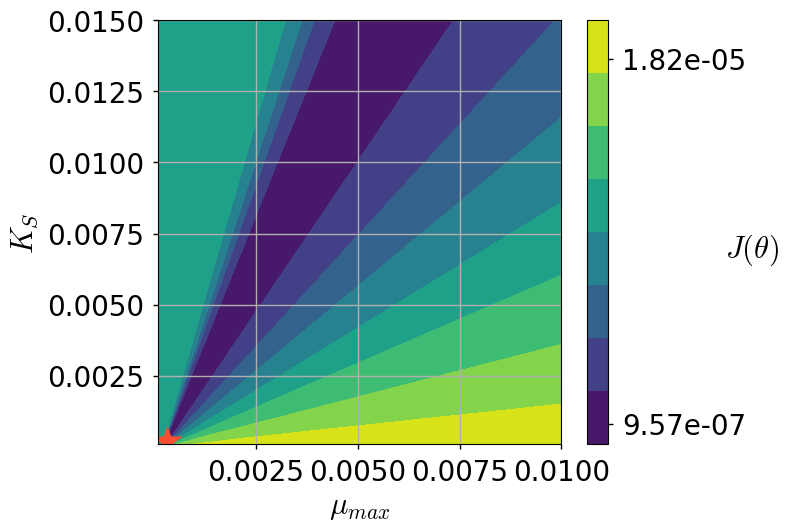

In [24]:
general_functions.plot_contour_monod(optimizer,optimal_params)
#plt.savefig(os.path.join(path_figures,'HS_7','contours_monod.svg'), bbox_inches='tight')